Started on 05/27/25

Looking at a wide exploration of parameter pairs.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/"

SIZE = 10000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"

datafiles = [
    "wide_svd|2025-05-25/data.json",
    "svd_patch_logic|2025-05-27/data.json",
]

In [2]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
describe(df)

In [3]:
df = pd.concat([df1, df2])
util.describe(df)

ratios: [100.0]
patch recovery: [0.0002 0.002]
max costs: [2.0]
boundary conditions: ['PERIODIC' 'SOLID']
num locations: [20 10]
random walker seeds: 8
random locations seeds: 2
patch recovery logic: ['LINEAR' 'SATURATING']


In [15]:
util.describe(df[df["settings.recoveryLogic"] == "SATURATING"])

ratios: [100.0]
patch recovery: [0.002]
max costs: [2.0]
boundary conditions: ['PERIODIC']
num locations: [10]
random walker seeds: 8
random locations seeds: 2
patch recovery logic: ['SATURATING']


In [18]:
recoveries = [0.002]
numLocations = [10]
seedLocations = [1, 2]
boundaryConditions = ["PERIODIC"]
steps = [10000]
recoveryLogics = ["SATURATING"]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                for step in steps:
                    for recoveryLogic in recoveryLogics:
                        _finals = df[
                            (df["steps"] == step) &
                            (df["settings.patchRecovery"] == recovery) &
                            # (df["ratio"] == 100.0) &
                            (df["settings.numLocations"] == numLocation) &
                            (df["settings.randomSeedLocations"] == seedLocation) &
                            (df["settings.boundaryConditions"] == boundaryCondition) &
                            (df["settings.recoveryLogic"] == recoveryLogic)
                        ]

                        U, S, Vh = util.svd(_finals, plot=False)
                        s = S**2/sum(S**2)
        
                        print(i, s[0], " --------- ", step, recoveryLogic, recovery, numLocation, seedLocation, boundaryCondition, S[0])
                        i += 1


0 0.5665641309763385  ---------  10000 SATURATING 0.002 10 1 PERIODIC 70.58633790961431
1 0.8398655524931363  ---------  10000 SATURATING 0.002 10 2 PERIODIC 79.78622493921141


In [5]:
recoveries = [0.002, 0.0002]
numLocations = [10, 20]
seedLocations = [1, 2]
boundaryConditions = ["SOLID", "PERIODIC"]
steps = [10000]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                for step in steps:
                    _finals = df[
                        (df["steps"] == step) &
                        (df["settings.patchRecovery"] == recovery) &
                        # (df["ratio"] == 100.0) &
                        (df["settings.numLocations"] == numLocation) &
                        (df["settings.randomSeedLocations"] == seedLocation) &
                        (df["settings.boundaryConditions"] == boundaryCondition) &
                        (df["settings.recoveryLogic"] == "LINEAR")
                    ]
                    U, S, Vh = util.svd(_finals, plot=False)
                    s = S**2/sum(S**2)
    
                    print(i, s[0], " --------- ", step, recovery, numLocation, seedLocation, boundaryCondition, S[0])
                    i += 1


0 0.8500515016744362  ---------  10000 0.002 10 1 SOLID 72.98721606087688
1 0.8429656504938745  ---------  10000 0.0002 10 1 SOLID 70.66456986136576
2 0.5689374592582078  ---------  10000 0.002 10 1 PERIODIC 59.728468659603166
3 0.8364393814698168  ---------  10000 0.0002 10 1 PERIODIC 59.625695295605105
4 0.7137886546680573  ---------  10000 0.002 10 2 SOLID 67.77365713091508
5 0.7286588768886201  ---------  10000 0.0002 10 2 SOLID 66.62545648042247
6 0.930471126109495  ---------  10000 0.002 10 2 PERIODIC 70.34984913467679
7 0.8539415761553765  ---------  10000 0.0002 10 2 PERIODIC 68.4140970162631
8 0.7908300676563987  ---------  10000 0.002 20 1 SOLID 71.39477481674216
9 0.675581106328379  ---------  10000 0.0002 20 1 SOLID 53.200848209758824
10 0.7061982752328295  ---------  10000 0.002 20 1 PERIODIC 60.57995867578055
11 0.9019437896042038  ---------  10000 0.0002 20 1 PERIODIC 54.8372828019373
12 0.7093533550984993  ---------  10000 0.002 20 2 SOLID 66.12028114468409
13 0.6519689

In [61]:
recoveries = [0.002, 0.0002]
numLocations = [10, 20]
seedLocations = [1, 2]
boundaryConditions = ["SOLID", "PERIODIC"]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                _finals = df[
                    (df["steps"] == 10000) &
                    (df["settings.patchRecovery"] == recovery) &
                    # (df["ratio"] == 100.0) &
                    (df["settings.numLocations"] == numLocation) &
                    (df["settings.randomSeedLocations"] == seedLocation) &
                    (df["settings.boundaryConditions"] == boundaryCondition)
                ]
                U, S, Vh = util.svd(_finals, plot=False)
                s = S**2/sum(S**2)

                print(i, s[0], " --------- ", recovery, numLocation, seedLocation, boundaryCondition, S[0])
                i += 1


0 0.7602579317468348  ---------  0.002 10 1 SOLID 80.54021367736637
1 0.8429656504938745  ---------  0.0002 10 1 SOLID 70.66456986136576
2 0.5689374592582078  ---------  0.002 10 1 PERIODIC 59.728468659603166
3 0.8364393814698168  ---------  0.0002 10 1 PERIODIC 59.625695295605105
4 0.6556957257275888  ---------  0.002 10 2 SOLID 75.33955608387711
5 0.7286588768886201  ---------  0.0002 10 2 SOLID 66.62545648042247
6 0.930471126109495  ---------  0.002 10 2 PERIODIC 70.34984913467679
7 0.8539415761553765  ---------  0.0002 10 2 PERIODIC 68.4140970162631
8 0.7908300676563987  ---------  0.002 20 1 SOLID 71.39477481674216
9 0.675581106328379  ---------  0.0002 20 1 SOLID 53.200848209758824
10 0.7061982752328295  ---------  0.002 20 1 PERIODIC 60.57995867578055
11 0.9019437896042038  ---------  0.0002 20 1 PERIODIC 54.8372828019373
12 0.7093533550984993  ---------  0.002 20 2 SOLID 66.12028114468409
13 0.6519689275305012  ---------  0.0002 20 2 SOLID 55.09356118516524
14 0.810148924758487

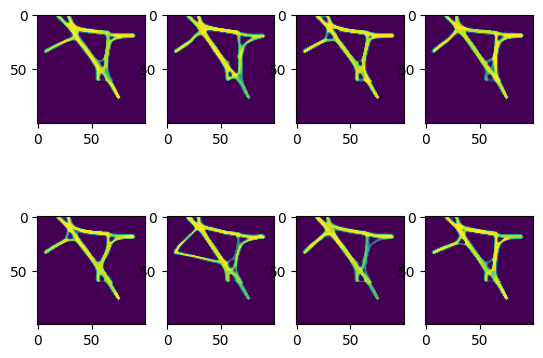

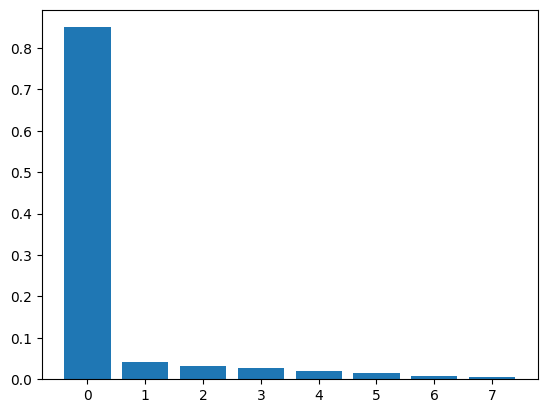

0 0.8500515016744362  ---------  0.002 10 1 SOLID 72.98721606087688


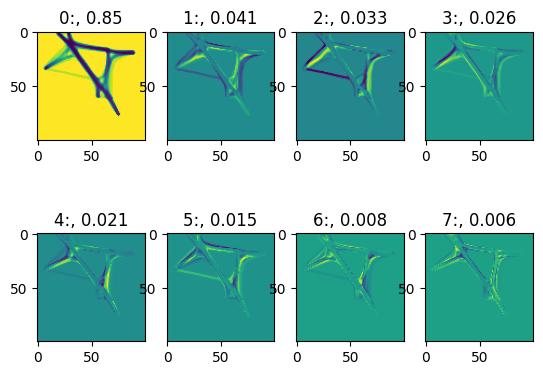

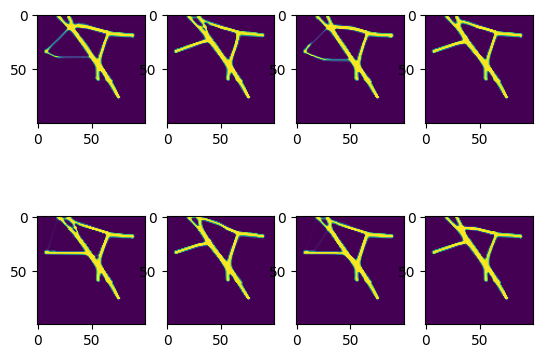

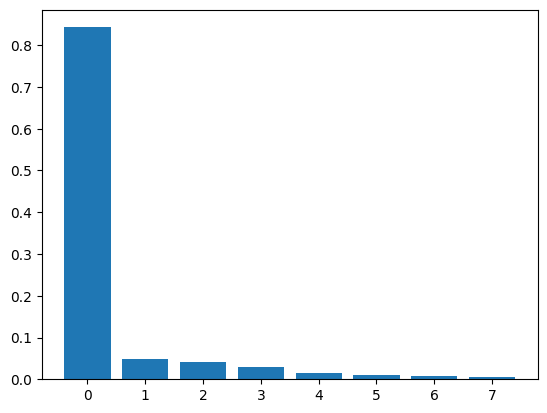

1 0.8429656504938745  ---------  0.0002 10 1 SOLID 70.66456986136576


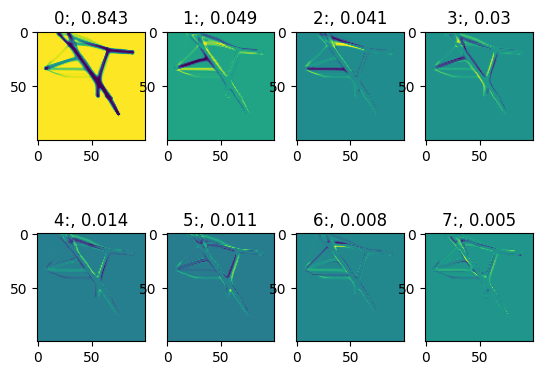

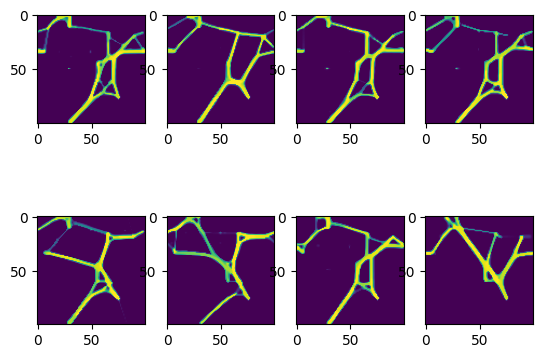

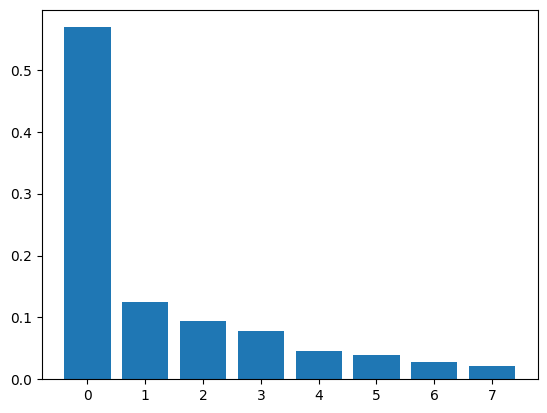

2 0.5689374592582078  ---------  0.002 10 1 PERIODIC 59.728468659603166


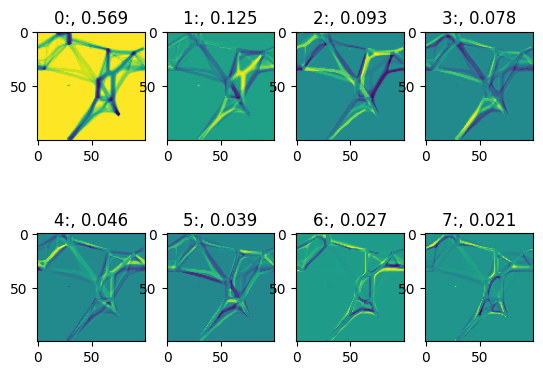

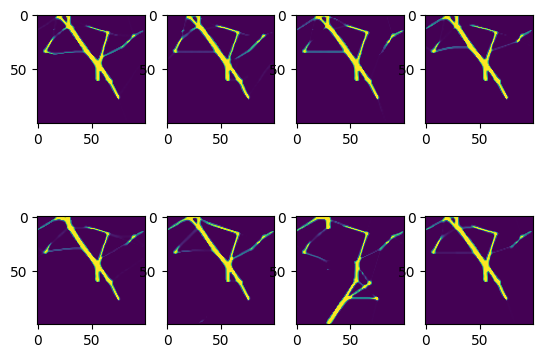

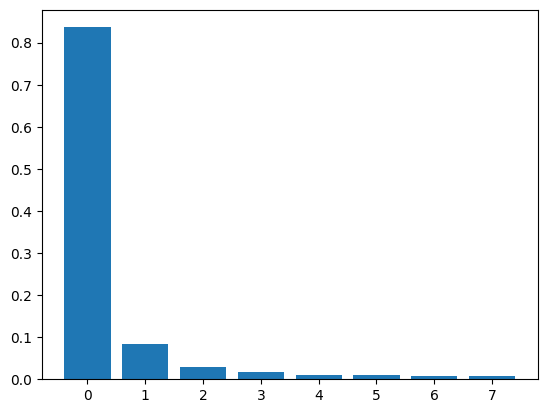

3 0.8364393814698168  ---------  0.0002 10 1 PERIODIC 59.625695295605105


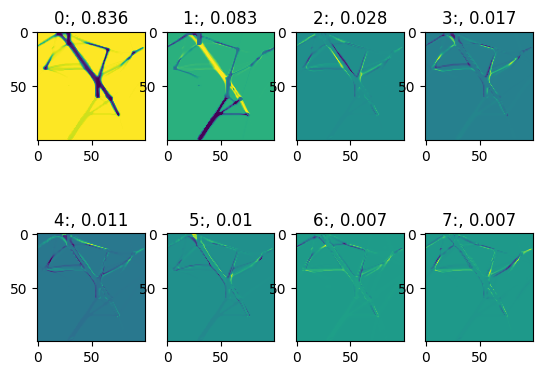

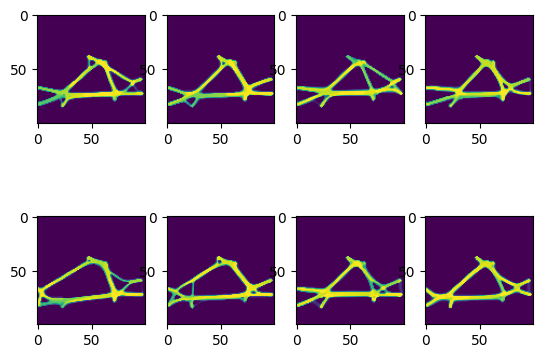

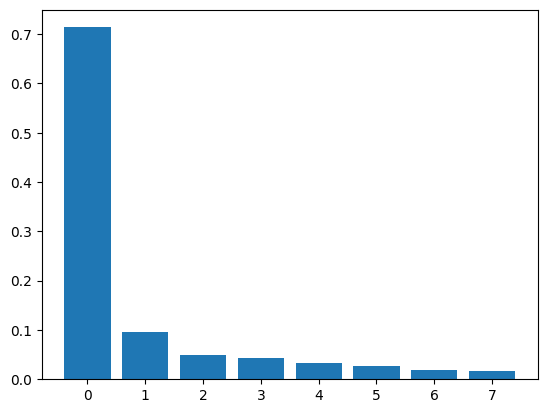

4 0.7137886546680573  ---------  0.002 10 2 SOLID 67.77365713091508


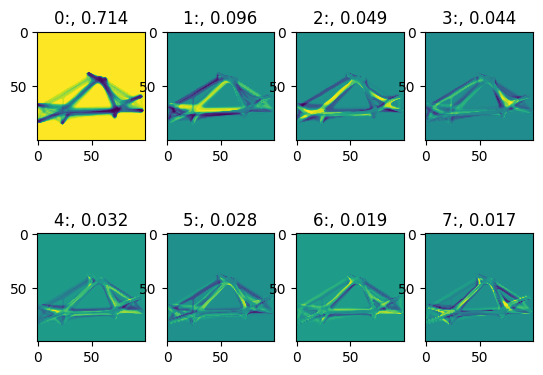

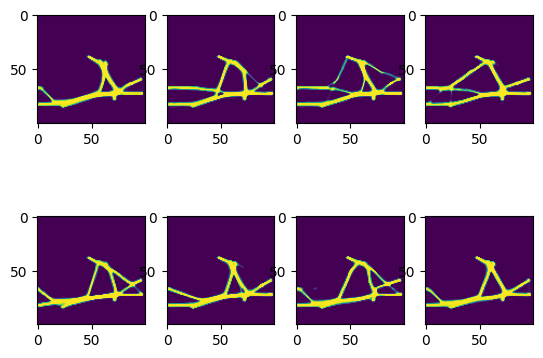

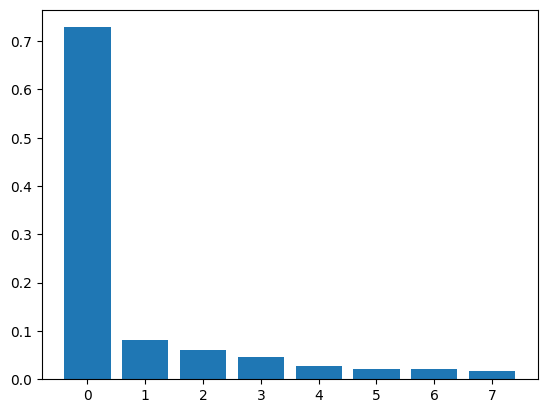

5 0.7286588768886201  ---------  0.0002 10 2 SOLID 66.62545648042247


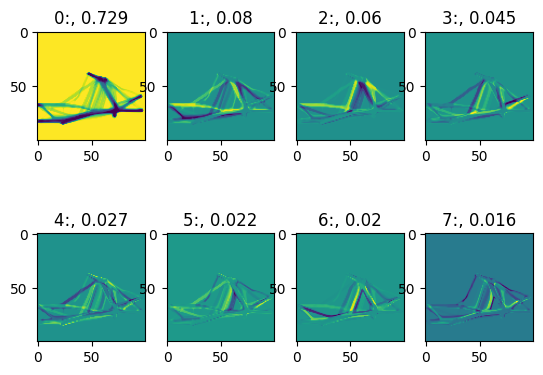

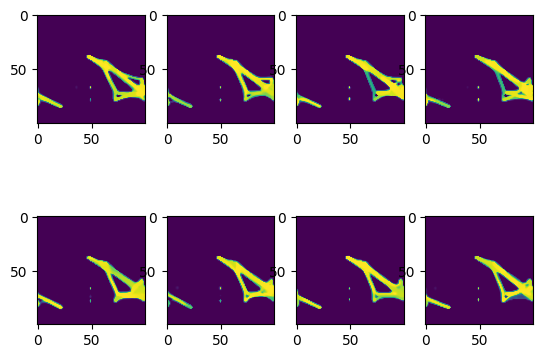

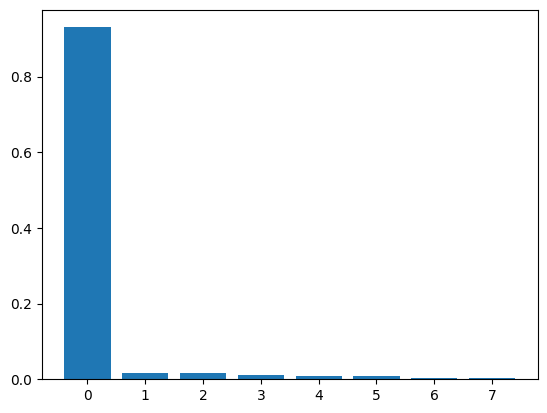

6 0.930471126109495  ---------  0.002 10 2 PERIODIC 70.34984913467679


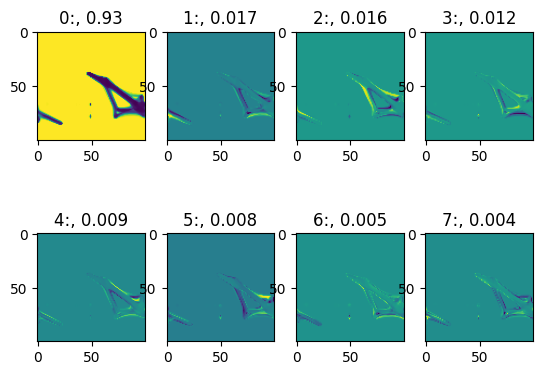

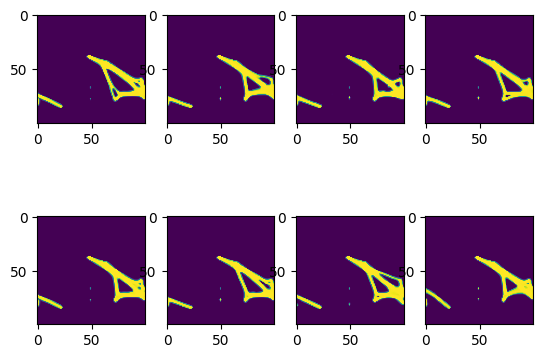

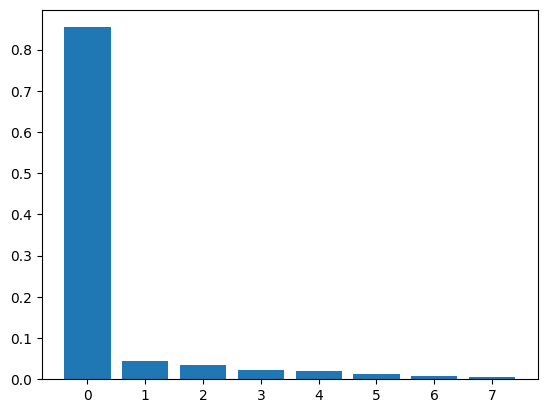

7 0.8539415761553765  ---------  0.0002 10 2 PERIODIC 68.4140970162631


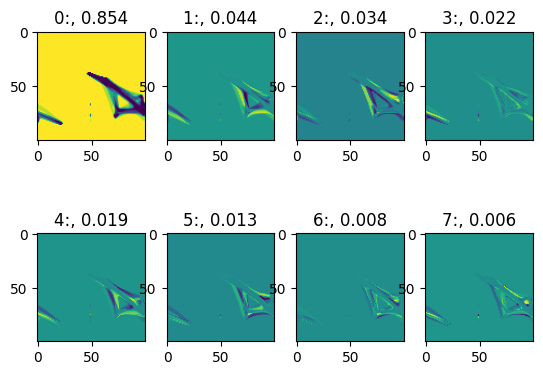

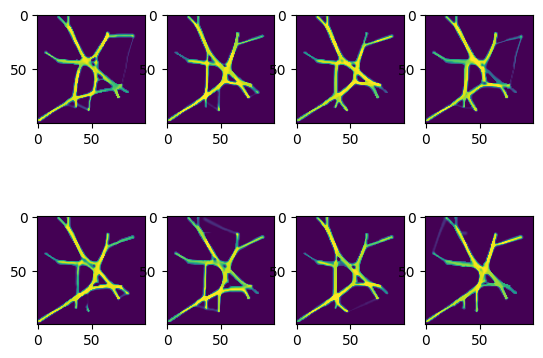

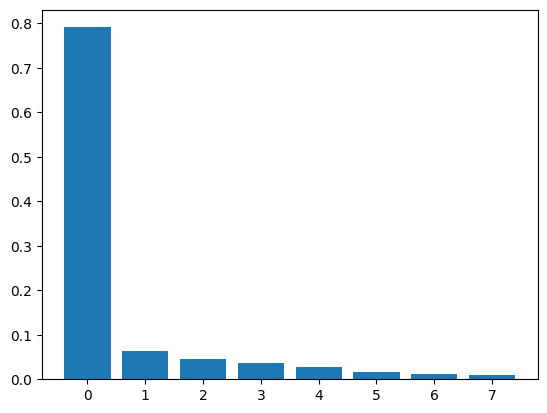

8 0.7908300676563987  ---------  0.002 20 1 SOLID 71.39477481674216


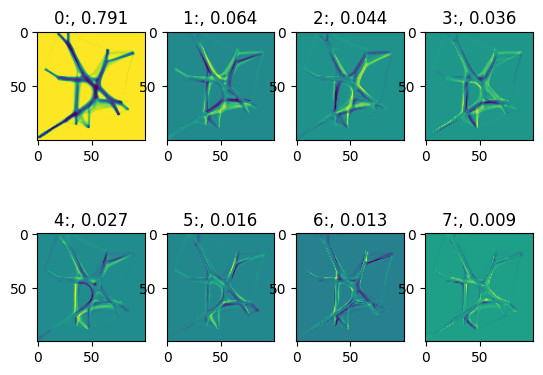

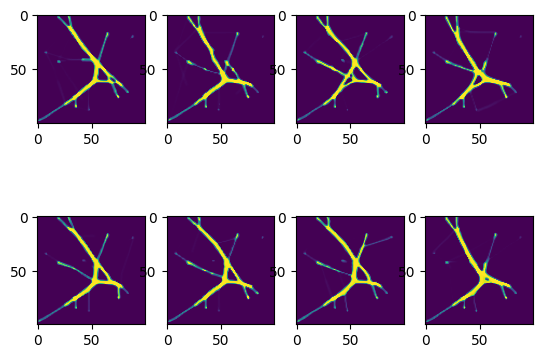

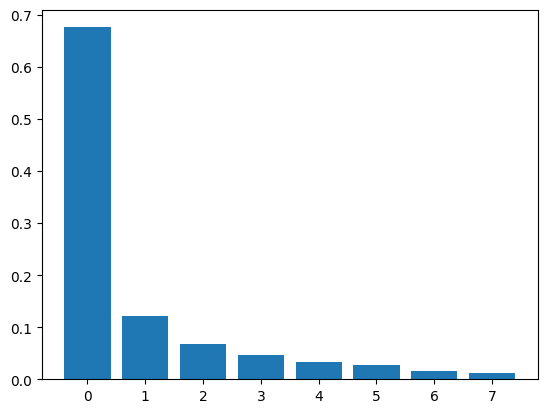

9 0.675581106328379  ---------  0.0002 20 1 SOLID 53.200848209758824


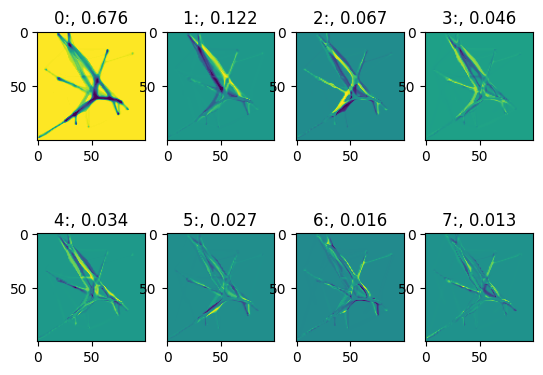

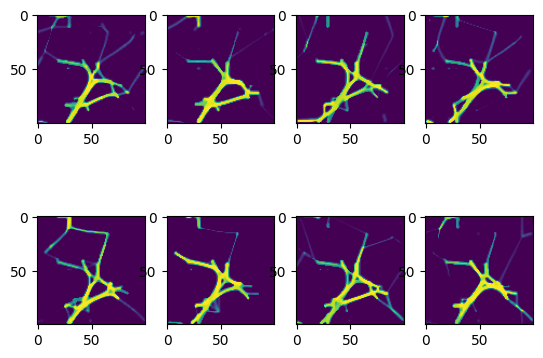

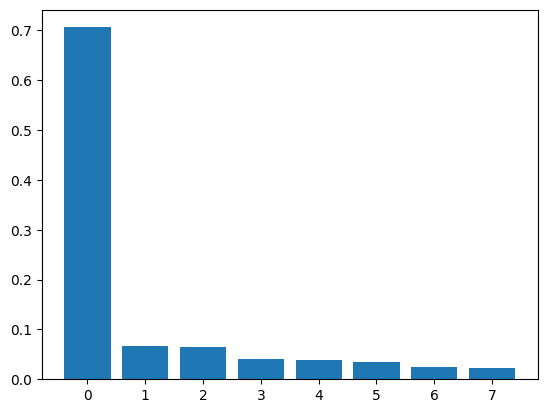

10 0.7061982752328295  ---------  0.002 20 1 PERIODIC 60.57995867578055


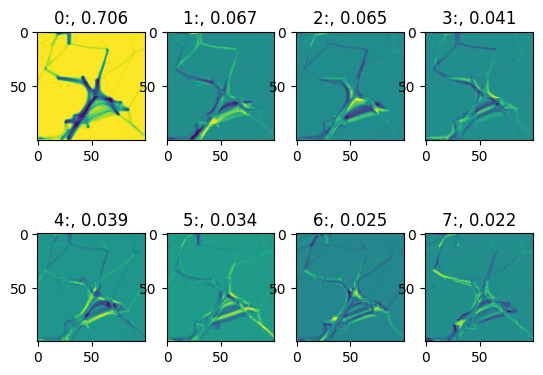

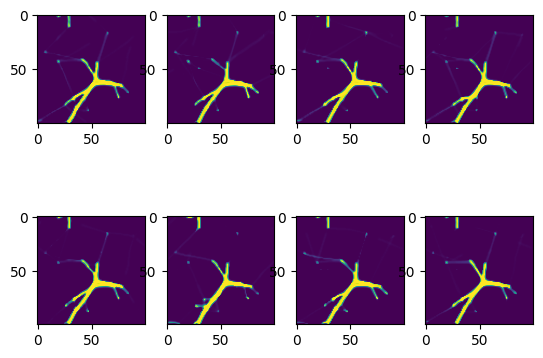

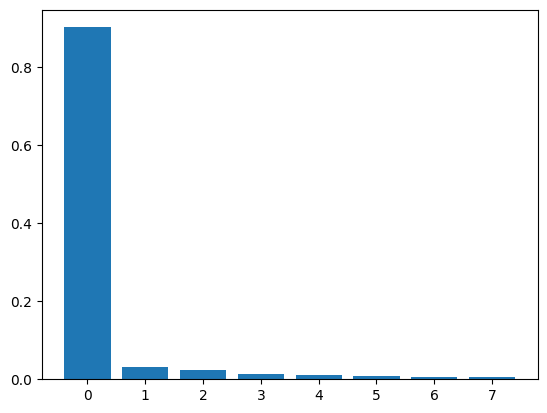

11 0.9019437896042038  ---------  0.0002 20 1 PERIODIC 54.8372828019373


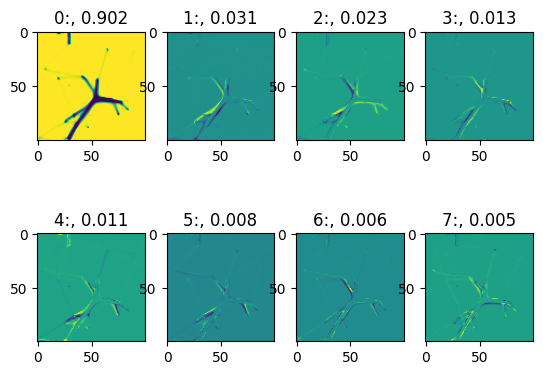

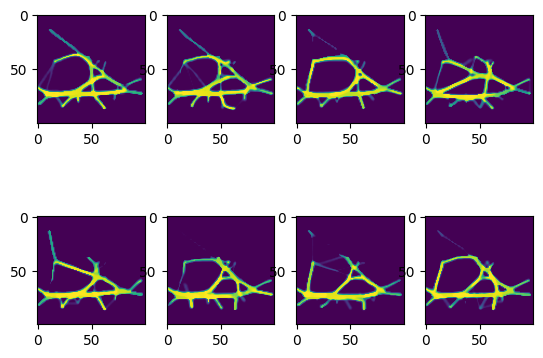

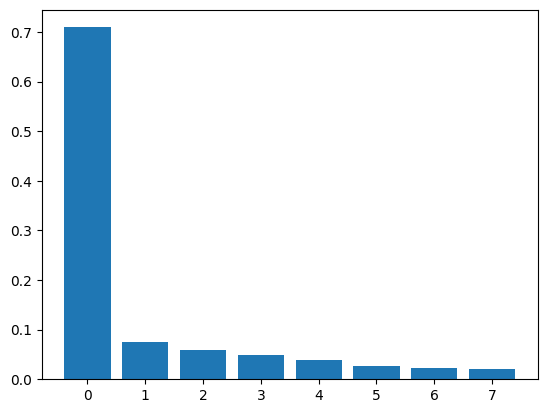

12 0.7093533550984993  ---------  0.002 20 2 SOLID 66.12028114468409


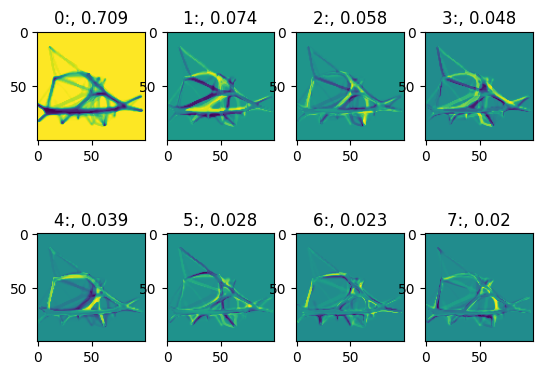

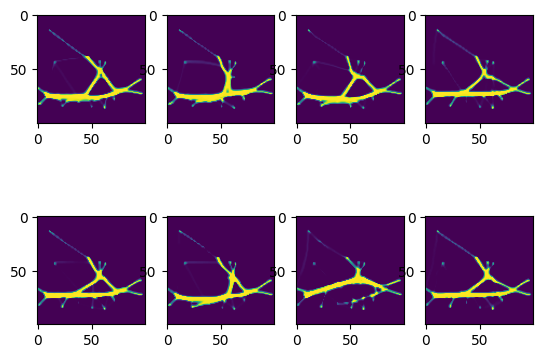

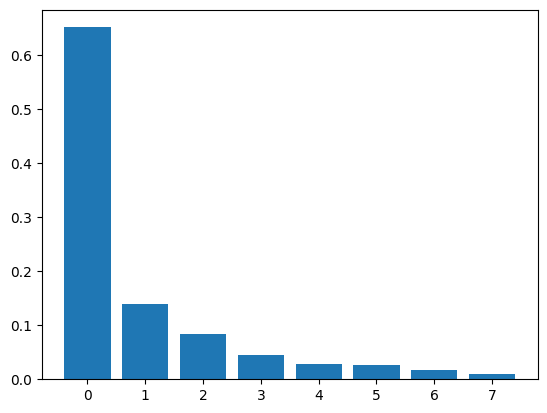

13 0.6519689275305012  ---------  0.0002 20 2 SOLID 55.09356118516524


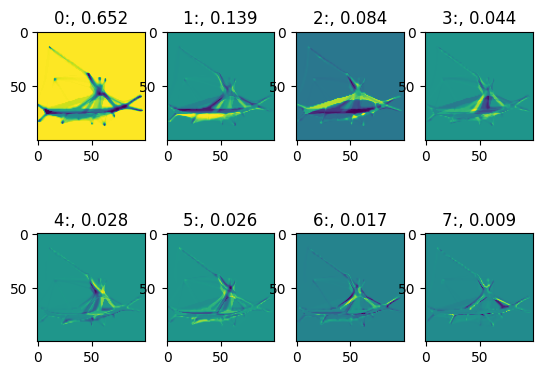

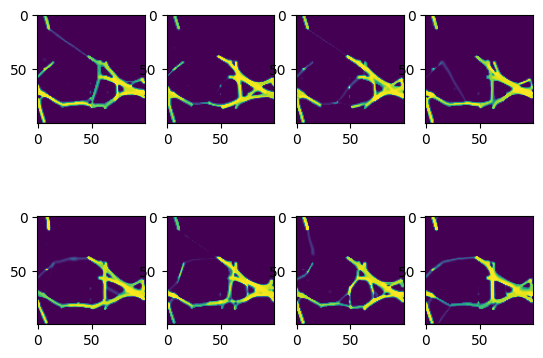

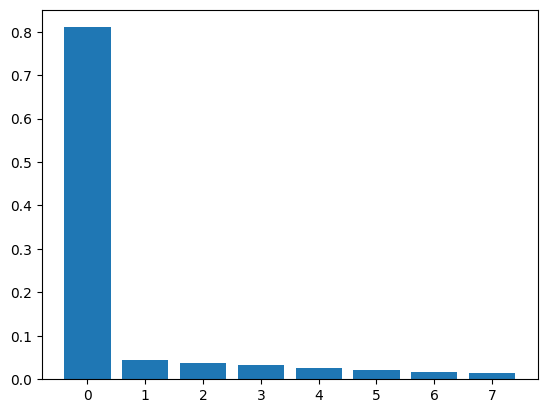

14 0.8101489247584878  ---------  0.002 20 2 PERIODIC 70.08309102400985


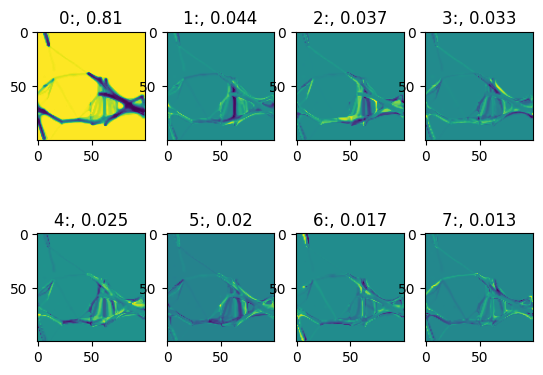

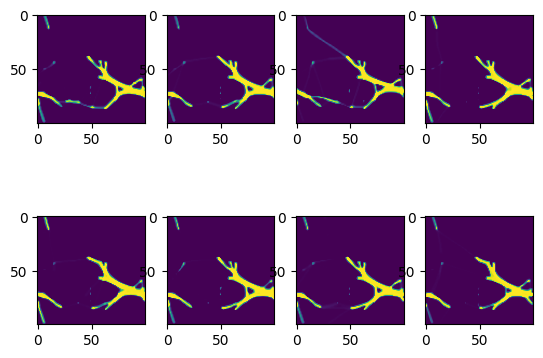

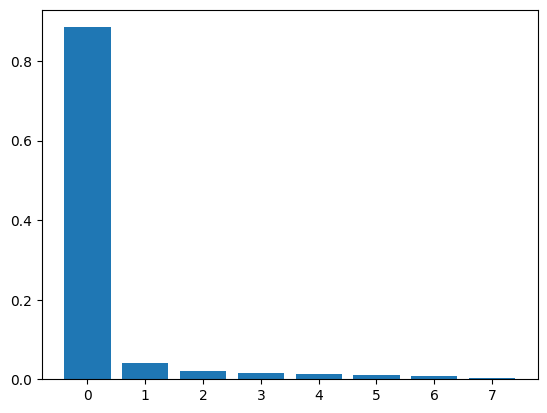

15 0.8847891744794419  ---------  0.0002 20 2 PERIODIC 63.61714170809314


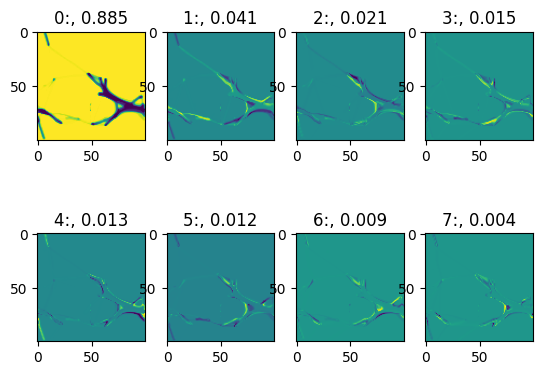

In [163]:
recoveries = [0.002, 0.0002]
numLocations = [10, 20]
seedLocations = [1, 2]
boundaryConditions = ["SOLID", "PERIODIC"]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                _finals = df[
                    (df["steps"] == 10000) &
                    (df["settings.patchRecovery"] == recovery) &
                    # (df["ratio"] == 100.0) &
                    (df["settings.numLocations"] == numLocation) &
                    (df["settings.randomSeedLocations"] == seedLocation) &
                    (df["settings.boundaryConditions"] == boundaryCondition)
                ]
                plot_patches(_finals)
                U, S, Vh = svd(_finals, plot=True)
                s = S**2/sum(S**2)

                print(i, s[0], " --------- ", recovery, numLocation, seedLocation, boundaryCondition, S[0])
                i += 1


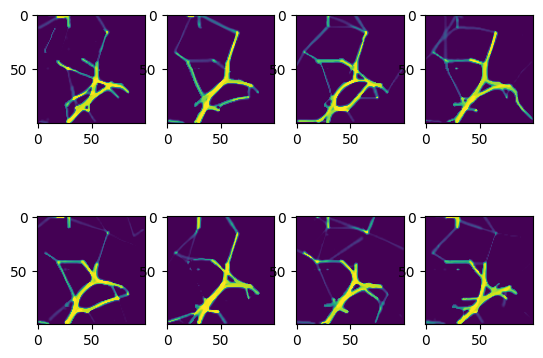

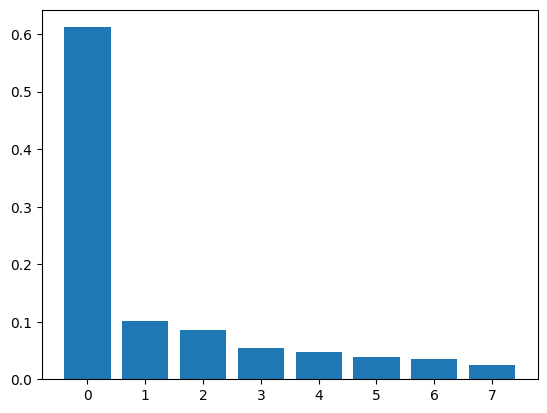

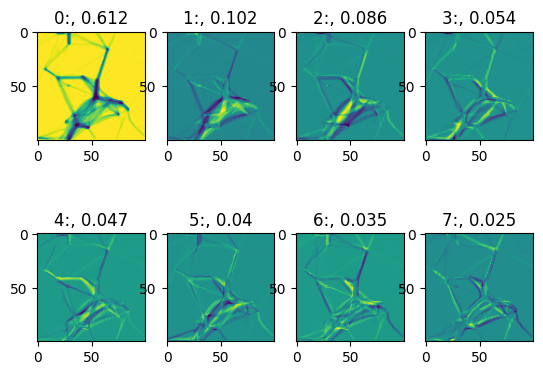

In [47]:
_df = df1
_finals = _df[
    # (_df["ratio"] == 100.0) &
    (_df["settings.numLocations"] == 20) &
    (_df["settings.randomSeedLocations"] == 1) &
    (_df["settings.boundaryConditions"] == "PERIODIC") &
    (_df["settings.patchRecovery"] == 0.002) &
    (_df["steps"] == 2000)

]

util.plot_patches(_finals)
util.svd(_finals);

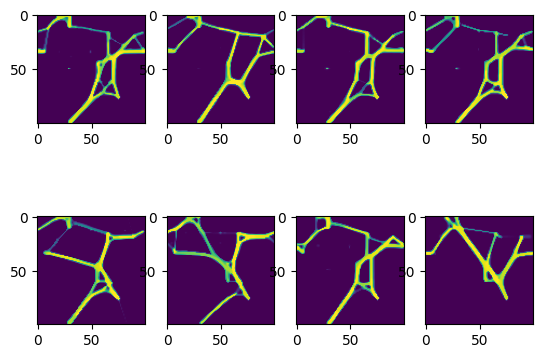

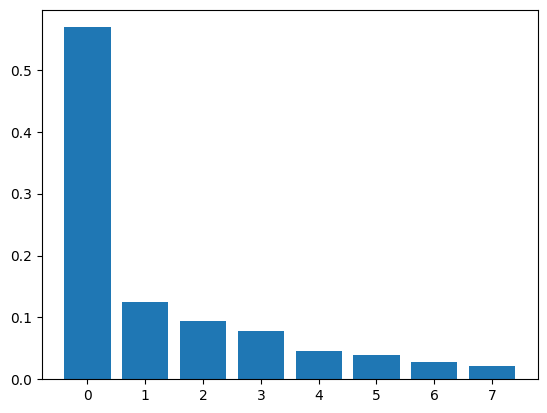

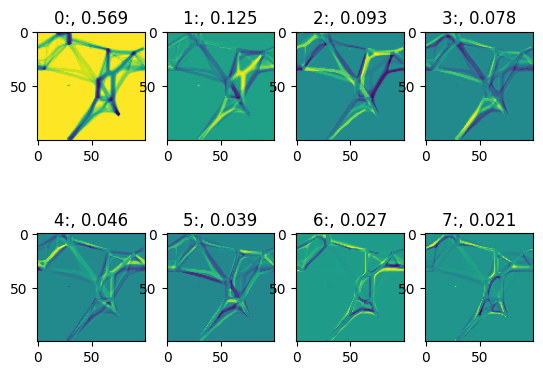

In [67]:
_finals = df[
    (df["settings.patchRecovery"] == 0.002) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    # (df["settings.recoveryLogic"] == "LINEAR") &
    (df["steps"] == 10000)
]

util.plot_patches(_finals)
util.svd(_finals);

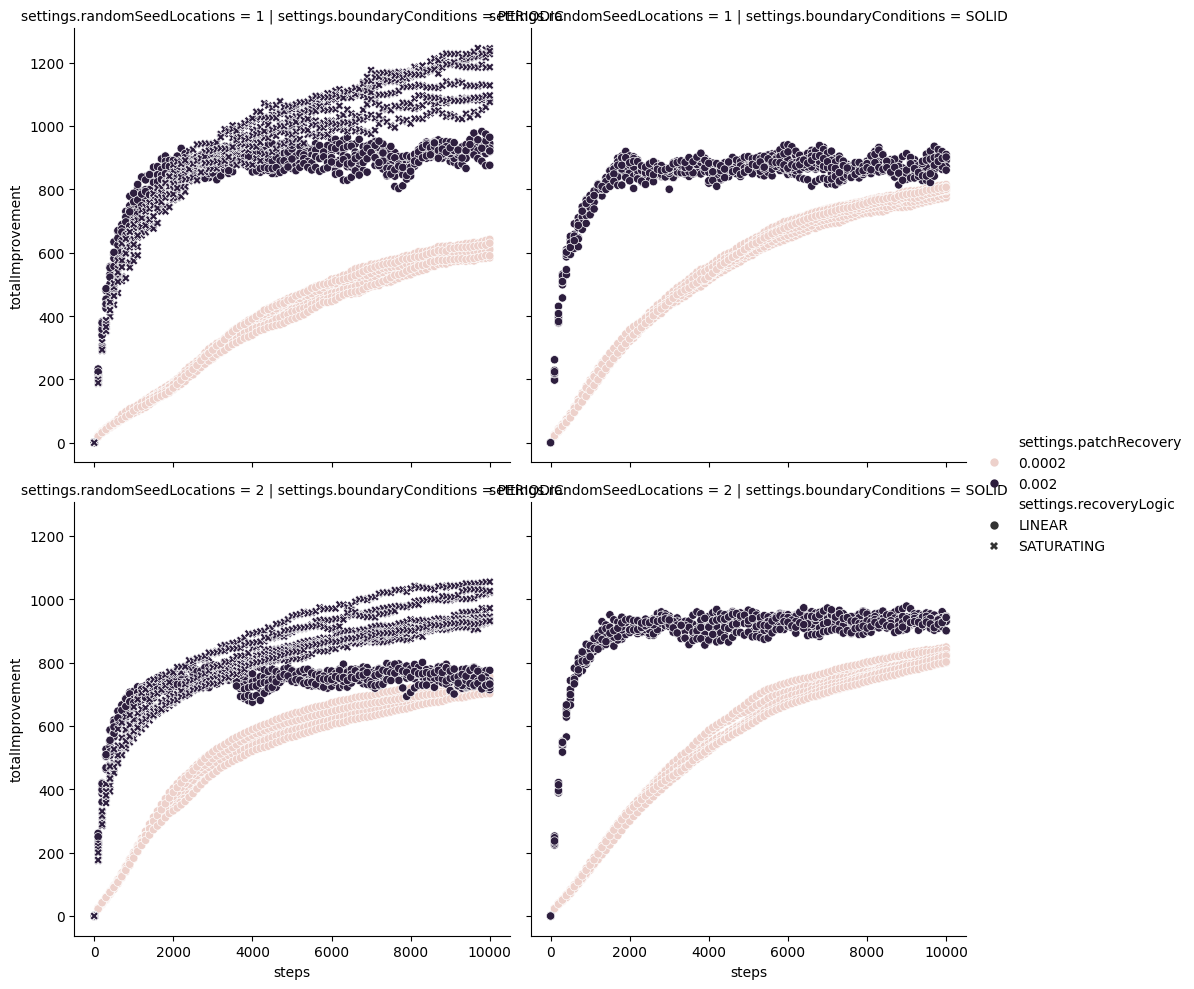

In [22]:
sns.relplot(data=df[df["settings.numLocations"] == 10],
            x="steps",
            y="totalImprovement",
            style="settings.recoveryLogic",
            hue="settings.patchRecovery",
            col="settings.boundaryConditions",
            row="settings.randomSeedLocations"
)

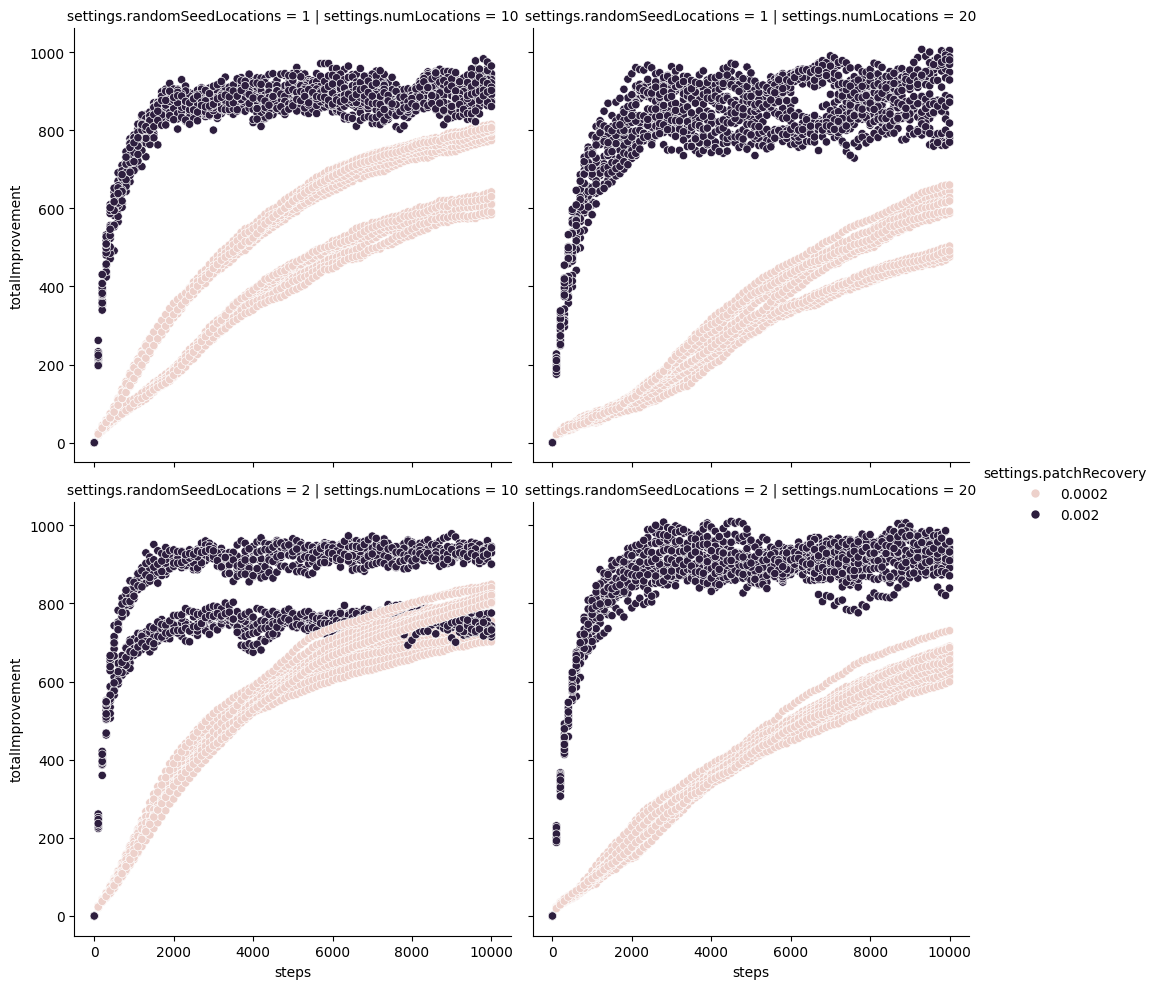

In [179]:
sns.relplot(data=df,
            x="steps",
            y="totalImprovement",
            hue="settings.patchRecovery",
            col="settings.numLocations",
            row="settings.randomSeedLocations"
)